# Algoritmo do Laboratório Nacional de Dados, visando fazer o parsing nos dados obtidos do DataSUS - Projeto Turing - Referente a Suícidios  
📄 Fonte dos dados (CSV):
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

📘 Dicionário de Dados (Data Dictionary):
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

Site Base dos dados:
https://opendatasus.saude.gov.br/dataset/sim/

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

In [2]:
# Jogando o arquivo CSV para dentro do notebook
df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv") # Para o Python ler o endereço windows tem que por um "r" antes do caminho do arquivo   

In [3]:
# Exibindo as primeiras 3 linhas do dataframe para ver se deu certo:
df.head(3)

,"contador;""ORIGEM"";""TIPOBITO"";""DTOBITO"";""HORAOBITO"";""NATURAL"";""CODMUNNATU"";""DTNASC"";""IDADE"";""SEXO"";""RACACOR"";""ESTCIV"";""ESC"";""ESC2010"";""SERIESCFAL"";""OCUP"";""CODMUNRES"";""LOCOCOR"";""CODESTAB"";""CODMUNOCOR"";""IDADEMAE"";""ESCMAE"";""ESCMAE2010"";""SERIESCMAE"";""OCUPMAE"";""QTDFILVIVO"";""QTDFILMORT"";""GRAVIDEZ"";""SEMAGESTAC"";""GESTACAO"";""PARTO"";""OBITOPARTO"";""PESO"";""TPMORTEOCO"";""OBITOGRAV"";""OBITOPUERP"";""ASSISTMED"";""EXAME"";""CIRURGIA"";""NECROPSIA"";""LINHAA"";""LINHAB"";""LINHAC"";""LINHAD"";""LINHAII"";""CAUSABAS"";""CB_PRE"";""COMUNSVOIM"";""DTATESTADO"";""CIRCOBITO"";""ACIDTRAB"";""FONTE"";""NUMEROLOTE"";""DTINVESTIG"";""DTCADASTRO"";""ATESTANTE"";""STCODIFICA"";""CODIFICADO"";""VERSAOSIST"";""VERSAOSCB"";""FONTEINV"";""DTRECEBIM"";""ATESTADO"";""DTRECORIGA"";""OPOR_DO"";""CAUSAMAT"";""ESCMAEAGR1"";""ESCFALAGR1"";""STDOEPIDEM"";""STDONOVA"";""DIFDATA"";""NUDIASOBCO"";""DTCADINV"";""TPOBITOCOR"";""DTCONINV"";""FONTES"";""TPRESGINFO"";""TPNIVELINV"";""DTCADINF"";""MORTEPARTO"";""DTCONCASO"";""ALTCAUSA"";""CAUSABAS_O"";""TPPOS"";""TP_ALTERA"";""CB_ALT"""
0,"1;""1"";""2"";""14022023"";""0930"";""833"";""330270"";""10..."
1,"2;""1"";""2"";""14022023"";""1730"";""822"";""221110"";""12..."
2,"3;""1"";""2"";""14022023"";""0500"";""822"";""220790"";""10..."


Não deu certo porque a função de ler CSV imagina sozinha que o separador seja uma virgula, e por isso não converte,  
 no caso em questão o separador do arquivo é um ';" como podemos.  
contador;"ORIGEM";"TIPOBITO";"DTOBITO";

In [4]:
# Explicitando o separador como ponto e vírgula para a leitura correta do arquivo
df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv", sep=';')

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_26424\1699433278.py:2: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv", sep=';')


Este warning: "DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False"  
quer dizer que o Python esta lendo coluna por coluna e atribuindo para cada uma um tipo, exemplo:  
Essa aqui é tipo numérico, essa é float, essa é texto...  
Mas para isso ele gasta memória, uma opção que consumiria menos processamento seria a gente olhar o arquivo original  
e especificar no parametro da funcão o tipo de cada coluna, opção mais viavél para arquivos mais pesados.

In [5]:
# Vamos exibir a cabeça do DataFrame para verificar se os dados foram carregados corretamente
df.head(3)

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2,1,2,14022023,1730.0,822.0,221110.0,12091956.0,466,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,3,1,2,14022023,500.0,822.0,220790.0,10011953.0,470,2,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN


Ok, uma vez carregado o dataframe vamos fazer o parsing (depara), tratando cada uma das 86 colunas numéricas para que fique em uma entrada mais palatável;  
Resumindo vamos desencripitar a Enigma rsrs.

In [6]:
# Removendo Coluna 'contador', uma vez que parece sujeira no DataFrame, creio que teria que ter usado o padrão reset_index() na importação  
# mas assim também funciona:
df = df.drop(columns=['contador'])
df.head(1)

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


Agora vamos na sequencia direita para esquerda fazer o parser nas proximas uma a uma, são 86 o.o',  
A partir daqui precisamos estar com o dicionário em mãos:  
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

A primeira coluna é Origem:

Origem do registro. (1- Oracle; 2 - Banco estadual diponibilizado via FTP; 3 -
Banco SEADE; 9 - Ignorado)  
Indica o banco de dados origem, não vamos usar ela então:


In [7]:
df = df.drop(columns=['ORIGEM']) # Removendo a coluna 'ORIGEM' que não é necessária
df.head(1) # Exibindo a primeira linha do DataFrame para verificação

,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A proxima coluna é TIPOOBITO:  
Tipo do óbito Óbito fetal: morte antes da expulsão ou da extração completa do   
corpo da Mãe, independentemente da duração da gravidez. Indica o óbito o  
fato de o feto, depois da expulsão do corpo materno, não respirar nem  
apresentar nenhum outro sinal de vida, como batimentos do coração,   
pulsações do cordão umbilical ou movimentos efetivos dos músculos de  
contração voluntária. (1-Fetal; 2-Não Fetal)  
Como trata de óbitos fetias não tem relação com nosso estudo (suicídio)  
Vamos tirar ela também:

Como pelo jeito vamos ficar repetindo esta remoção de colunas vou criar uma função para facilitar nossa vida:

In [8]:
def drop(col, df_name='df'):
    globals()[df_name] = globals()[df_name].drop(columns=[col])
    return globals()[df_name].head(1)

Agora ao inves de precisar digitar este codigo grande:  
df = df.drop(columns=['TIPOOBITO']) # Removendo a coluna 'ORIGEM' que não é necessária  
df.head(1) # Exibindo a primeira linha do DataFrame para verificação  
podemos digitar apenas:


In [9]:
drop('TIPOBITO')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A próxima coluna é DTOBITO (data do óbito), só de olhar já da ver que ela indica ddmmaaa, então vamos transformar ela no formato padrão de data do python:

In [10]:
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

ValueError: day is out of range for month, at position 35. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

deu esse ValueError: day is out of range for month, at position 35.  
disse que a linha 35 esta com algum erro, vamos dar uma olhada nela:

In [11]:
df['DTOBITO'][35] # Exibindo a data de óbito da linha 35 para verificação

1072023

Ele deveria ser 01072023, mas perdeu o zero à esquerda.  
então antes de converter vamos preencher toda a coluna com 8 digitos  
utilizando a funcao zfill:

In [12]:
df['DTOBITO'] = (df['DTOBITO'].astype(str).str.zfill(8))
df['DTOBITO'][35] # Exibindo a data de óbito da linha 35 para verificação

'01072023'

In [13]:
# Uma vez tratados os zeros a esquerda, agora podemos converter para datetime
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

Agora vamos ver se deu certo:  
Se retornar 0 → ✅ tudo certo  
Se > 0 → ⚠️ existem datas inválidas  

In [14]:
df['DTOBITO'].isna().sum()

0

🧠 O que significa isna()?  
isna() verifica se o valor está ausente / inválido.  
Em pandas, isso inclui:  
NaN → número ausente  
NaT → data inválida / ausente  
None → valor nulo  

In [15]:
# Vamos ainda dar mais uma olhada na coluna:
df['DTOBITO']

0         2023-02-14
1         2023-02-14
2         2023-02-14
3         2023-02-14
4         2023-02-14
             ...    
1465605   2023-11-30
1465606   2023-12-12
1465607   2023-12-22
1465608   2023-12-22
1465609   2023-12-31
Name: DTOBITO, Length: 1465610, dtype: datetime64[ns]

deu certo

In [16]:
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A próxima coluna é HORAOBITO

In [17]:
df['HORAOBITO']

0           930.0
1          1730.0
2           500.0
3          2235.0
4           940.0
            ...  
1465605    2100.0
1465606    1220.0
1465607    1734.0
1465608    2030.0
1465609       NaN
Name: HORAOBITO, Length: 1465610, dtype: float64

Pelo jeito ela esta como decimal atoa, o ".0" (float) esta errado, ao que parece ela é inteiro e hhmm em um padrão de 24h  
vamos tratar

In [18]:
# Primeiro vamos remover o float:
df['HORAOBITO'] = df['HORAOBITO'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Nao funcionou porque a coluna tem algum valor NA, vamos ver:

In [19]:
df['HORAOBITO'].isna().sum()

49218

Para tratar isso basta colocar o parametro "errors='coerce' que ele manterá os NA

In [20]:
df['HORAOBITO'] = pd.to_datetime(df['HORAOBITO'], format='%H%M', errors='coerce').dt.time
df['HORAOBITO']
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


In [21]:
df.head(1)  # Exibindo as primeiras linhas do DataFrame para verificação

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


Agora o desafio começa a ficar maior, vamos olhar a coluna "NATURAL", uma vez que não é tão intuitivo o que significa cada número,  
vamos consultar no dicionário, lá achei que esta coluna indica: 
  
"País e Unidade da Federação onde falecido nasceu. e estrangeiro informar
País. (Números) 1979 "  

Fui pesquisar na internet achei que o IBGE tem uma lista de código para os Estados>

https://www.ibge.gov.br/explica/codigos-dos-municipios.php


Vamos testar a hipótese de que seja a tabela a cima, nela temos que do estado de SP é 35,  
iremos agora dar uma olhada nos dados para ver se bate a maior incidência neste número.


In [22]:
df['NATURAL'].value_counts() # Essa função conta quantas vezes cada entrada única aparece na coluna 'NATURAL'

NATURAL
835.0    240480
831.0    195648
829.0    129836
843.0     99518
833.0     96494
          ...  
80.0          1
136.0         1
270.0         1
123.0         1
148.0         1
Name: count, Length: 163, dtype: int64

Podemos notar acima que existe uma maior incidência em número que começam com "8" e acabam com 35, 31, 29, 43  
Pela lista do IBGE 35 = SP, 31 = MG, 29 = BH e 43 = RS, segundo essa Tése o primeiro digito "8" seria = BR

Vamos tentar validar isto com pesquisa, segundo apurei na internet:
Aqui estão os principais estados em população (estimativas 2024-2025):  
São Paulo (SP): ~46 milhões.  
Minas Gerais (MG): ~21,3 milhões.  
Rio de Janeiro (RJ): ~17,2 milhões.  
Bahia (BA): ~14,8 milhões.  
Paraná (PR): ~11,8 milhões.  
Rio Grande do Sul (RS): ~11,2 milhões.   

Encontramos entre as maiores populações SP MG BG E RS nesta ordem, está na mesma ordem,  
Segundo a tese de que os códigos da tabelas seriam os mesmos do do IBGE,
mas neste caso deveriamos ter também RJ E PR entre os maiores,  
como contra prova vamos verificar: na tabela do IBGE  RJ = 41 e PR = 33, seria o equivalente a 841.0 e 833.0  
Se a tése estiver correta temos que ter grandes incidências desses dois números na nossa coluna

In [23]:
# total de registros (ignorando NaN)
total = df['NATURAL'].notna().sum()

# top 10 valores + percentual
top10 = (
    df['NATURAL']
    .value_counts()
    .head(10)
    .rename('qtd')
    .to_frame()
)

top10['perc_%'] = (top10['qtd'] / total * 100).round(2)

top10


,qtd,perc_%
NATURAL,,
835.0,240480,17.18
831.0,195648,13.98
829.0,129836,9.27
843.0,99518,7.11
833.0,96494,6.89
826.0,86386,6.17
823.0,74799,5.34
841.0,69710,4.98
842.0,44639,3.19


Tése validada com sucesso os números são referentes a lista de Municípios do IBGE e o oito a esquerda é = Brasil

In [24]:
# Para começar a fazer depara, vamos tirar o ".0" dos valores da coluna 'NATURAL', tratando como inteiro:
df['NATURAL'] = df['NATURAL'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Deu erro, a conversão para inteiro, não aceita valores nulos,   
então vamos usar a funcao pd.to_numeric e colocar o parâmetro erros='coerce' 
este parâmetro vai converter e se der erro ele retorna "NaN"

In [25]:
df['NATURAL'] = (pd.to_numeric(df['NATURAL'], errors='coerce').astype('Int64'))
df['NATURAL'].value_counts().head(10)

NATURAL
835    240480
831    195648
829    129836
843     99518
833     96494
826     86386
823     74799
841     69710
842     44639
821     44195
Name: count, dtype: Int64

In [37]:
# Criei este código abaixo com ajuda da IA para fazer o de/para dos códigos das unidades federativas brasileiras
uf_map = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal"
}

df['NATURAL'] = (
    df['NATURAL']
    .where(df['NATURAL'].between(800, 899))  # só Brasil
    .mod(100)                               # últimos 2 dígitos
    .map(uf_map)                            # de/para UF
    .fillna('Estrangeiro')                  # o que não converte
)

df['NATURAL'].value_counts().head(10)


C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_26424\664471063.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NATURAL'] = (


NATURAL
São Paulo            2242
Minas Gerais         1909
Rio Grande do Sul    1650
Paraná               1113
Bahia                1048
Ceará                 824
Santa Catarina        783
Rio de Janeiro        748
Pernambuco            677
Estrangeiro           634
Name: count, dtype: int64

In [26]:
df.head(10)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2023-02-14,17:30:00,822,221110.0,12091956.0,466,1,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,2023-02-14,05:00:00,822,220790.0,10011953.0,470,2,NaN,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,2023-02-14,22:35:00,823,231180.0,15121943.0,479,2,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,2023-02-14,09:40:00,841,411350.0,9041973.0,449,2,4.0,1.0,1.0,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN
5,2023-02-14,09:06:00,835,355330.0,14091947.0,475,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,W188,S,NaN,NaN
6,2023-02-14,12:02:00,823,230760.0,13051930.0,492,1,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E86,S,NaN,NaN
7,2023-02-14,02:42:00,826,260190.0,1071984.0,438,2,1.0,1.0,4.0,...,NaN,M,NaN,NaN,NaN,NaN,C539,NaN,NaN,NaN
8,2023-02-14,20:41:00,829,291370.0,5051936.0,486,2,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,C729,NaN,NaN,NaN
9,2023-02-14,20:24:00,843,431490.0,26021981.0,441,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Agora vamos converter a coluna 'CODMUNNATU', dedutivelmente Código do Município de Naturalidade (municípios),  
já segundo a mesma fonte, deve ser o código do IBGE,  
como contraprova vamos verificar os estados.

A lista do Ibge tem 5572 municípios, não da para explicitar direto no código com IA, como fiz com os estados, então:  
Copiei a lista manualmente colei no EXCEL, retirei os cabeçalhos duplicados, e criei um arquivo EXCEL que vou pegar abaixo:

In [27]:
codigomun = pd.read_excel(r"C:\Users\Kaue Mandarino\Desktop\Mestrado\degrees\Projeto-Turin\Arquivos de apoio\Códigos de Municípios IBGE.xlsx")
codigomun

,Munícipio,Códigos
0,AAcrelândia,1200013
1,Assis Brasil,1200054
2,BBrasiléia,1200104
3,Bujari,1200138
4,CCapixaba,1200179
...,...,...
5566,Tocantinópolis,1721208
5567,Tupirama,1721257
5568,Tupiratins,1721307
5569,WWanderlândia,1722081


Vemos que a tabela precisa de tratamento, porque o primeiro municipio de cada letra veio com o nome errado,  
Olhar a foto a seguir para entender o motivo:  
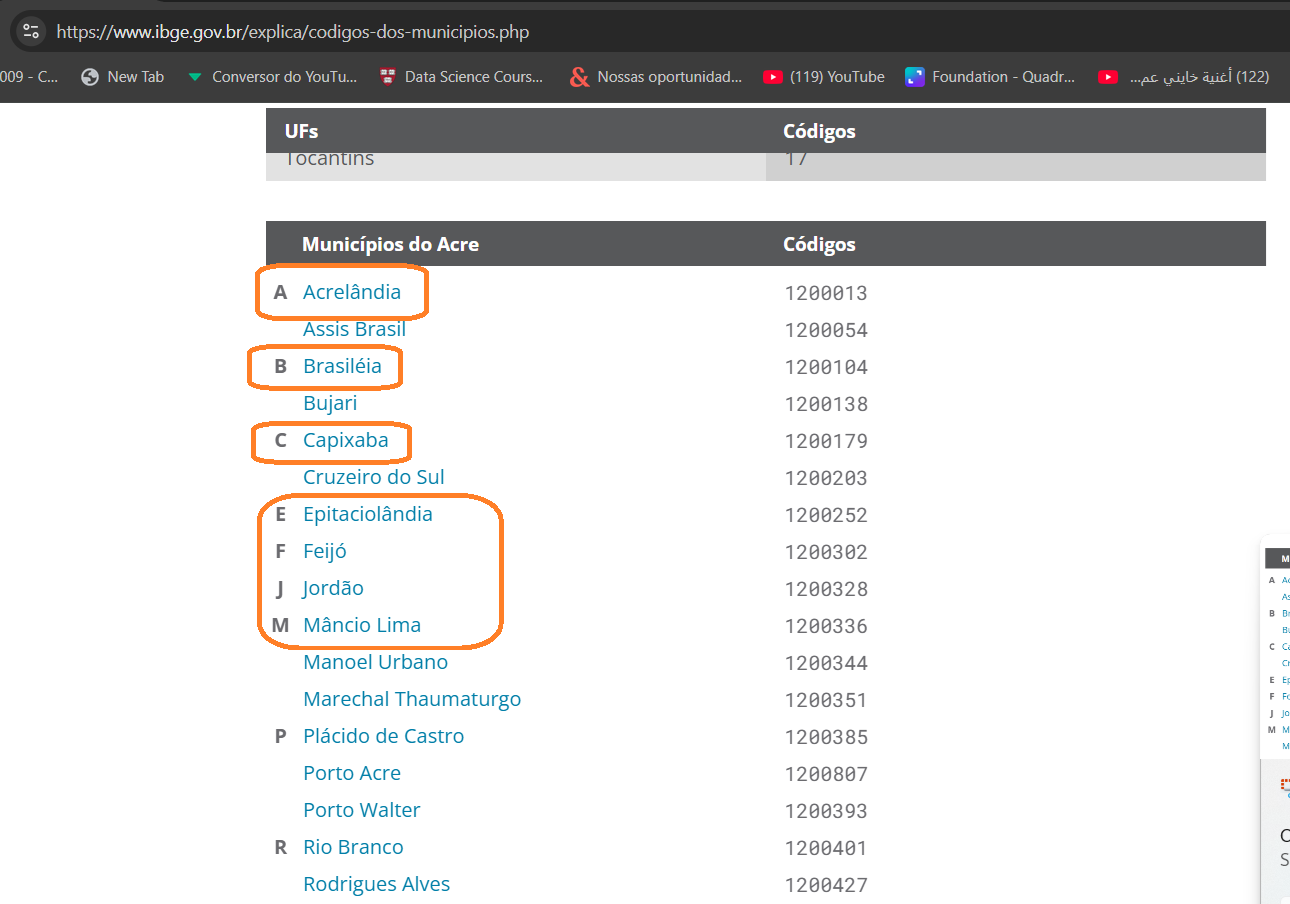

Vamos usar a função REGEX para achar todas as entradas que tiverem as duas primeiras letras maiúsculas e remover a primeira delas

^ → início da string

([A-Z])([A-Z]) → duas letras maiúsculas seguidas

\2 → mantém apenas a segunda letra


In [28]:
codigomun['Munícipio'] = codigomun['Munícipio'].str.replace(r'^([A-Z])([A-Z])', r'\2', regex=True)
codigomun['Códigos']

0       1200013
1       1200054
2       1200104
3       1200138
4       1200179
         ...   
5566    1721208
5567    1721257
5568    1721307
5569    1722081
5570    1722107
Name: Códigos, Length: 5571, dtype: int64

Olhando a tabela de códigos dos municipios vi que eles estão trazendo um último digito a mais, do que deveria, vou remover

In [29]:
codigomun['Códigos'] = codigomun['Códigos'] // 10
codigomun['Códigos'].head(3)

0    120001
1    120005
2    120010
Name: Códigos, dtype: int64

Agora sim vamos fazer o depara, cruzando os dados da tabela que subimos com o nosso conjunto do DATASUS,  
convertendo tudo que é codigo por nome do município

In [30]:
df['CODMUNNATU'] = df['CODMUNNATU'].map(codigomun.set_index('Códigos')['Munícipio'])
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833,Maricá,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2023-02-14,17:30:00,822,União,12091956.0,466,1,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,2023-02-14,05:00:00,822,Pedro II,10011953.0,470,2,NaN,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,2023-02-14,22:35:00,823,Russas,15121943.0,479,2,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,2023-02-14,09:40:00,841,Loanda,9041973.0,449,2,4.0,1.0,1.0,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465605,2023-11-30,21:00:00,816,Oiapoque,1042023.0,307,1,5.0,NaN,NaN,...,NaN,NaN,10062024.0,3.0,26052024.0,2.0,NaN,NaN,NaN,NaN
1465606,2023-12-12,12:20:00,815,Altamira,23101987.0,436,1,5.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465607,2023-12-22,17:34:00,815,Altamira,5112023.0,301,1,5.0,NaN,NaN,...,NaN,NaN,15042024.0,3.0,20032024.0,1.0,NaN,NaN,NaN,NaN
1465608,2023-12-22,20:30:00,813,Eirunepé,1012008.0,415,2,5.0,NaN,1.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conferindo o nome dos municípios vs Estado, deu certo

Agora vamos para 'DTNASC' vamos tentar a mesma abordagem que usamos para 'DTOBITO'

In [31]:
df['DTNASC'] = (
    df['DTNASC']
        .astype(str)                              # garante string
        .str.replace(r'\.0$', '', regex=True)     # remove .0 final
        .str.zfill(8)                             # completa com zeros à esquerda
)

df['DTNASC'] = pd.to_datetime(
    df['DTNASC'],
    format='%d%m%Y',
    errors='coerce'                               # inválidos viram NaT
)

df['DTNASC'].head(10)


0   1954-07-10
1   1956-09-12
2   1953-01-10
3   1943-12-15
4   1973-04-09
5   1947-09-14
6   1930-05-13
7   1984-07-01
8   1936-05-05
9   1981-02-26
Name: DTNASC, dtype: datetime64[ns]

Dessa vez foi mais fácil, proxima coluna é a IDADE, temos que:

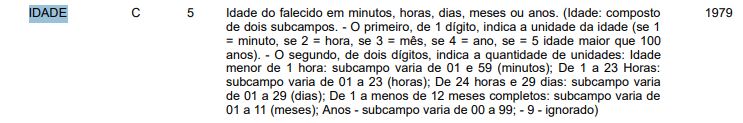

In [32]:
df['IDADE']

0          468
1          466
2          470
3          479
4          449
          ... 
1465605    307
1465606    436
1465607    301
1465608    415
1465609    214
Name: IDADE, Length: 1465610, dtype: int64

Como podemos notar acima a linha 1465609 é '214',  
onde 2 representa a medida 'Horas' e 14 o tempo de vida,  
neste ponto notei algo interessante, provavelmente trata-se da uma fatalidade não suicídio,
então lembrei que esta base traz todas as mortes, vou filtrar apenas os suicídios, para ficar mais fácil.  

Temos que: ,  
  
  
Então vamos filtrar apenas as linhas em que df['CIRCOBITO] = '2' 

In [33]:
df = df[df['CIRCOBITO'] == 2]
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,843,Porto Alegre,1981-02-26,441,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,842,Florianópolis,1982-05-09,440,2,1.0,1.0,5.0,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,<NA>,NaN,1990-11-29,432,2,1.0,1.0,3.0,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,843,Sobradinho,1962-12-07,460,1,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,843,Venâncio Aires,1991-01-15,431,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,2023-11-18,NaT,831,Santo Antônio do Rio Abaixo,1970-08-15,453,1,4.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,2023-09-27,20:00:00,816,Pedra Branca do Amapari,2005-03-26,418,1,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,2023-11-01,19:00:00,813,Eirunepé,2011-01-01,412,2,5.0,NaN,9.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465603,2023-11-26,15:40:00,813,Eirunepé,2002-01-01,421,2,5.0,NaN,1.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Vamos verificar agora novamente as idade
df['IDADE'].value_counts().head(100)

IDADE
426    386
427    376
441    375
428    368
435    365
      ... 
491      4
495      2
500      1
506      1
501      1
Name: count, Length: 90, dtype: int64

In [35]:
idade_str = df.loc[:, 'IDADE'].astype(str).str.zfill(3)

unidade_idade = idade_str.str[0].astype(int)
valor_idade   = idade_str.str[1:3].astype(int)

df.loc[:, 'IDADE'] = np.select(
    [
        unidade_idade == 1,  # minutos
        unidade_idade == 2,  # horas
        unidade_idade == 3,  # dias
        unidade_idade == 4,  # anos
        unidade_idade == 5   # >100 anos
    ],
    [
        valor_idade / (60 * 24 * 365),
        valor_idade / (24 * 365),
        valor_idade / 365,
        valor_idade,
        100
    ],
    default=np.nan
)

In [40]:
df.head(5)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41.0,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40.0,2,1.0,1.0,5.0,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32.0,2,1.0,1.0,3.0,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60.0,1,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31.0,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN


In [42]:
df.loc[:, 'IDADE'] = df['IDADE'].astype('Int64')
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Só por questão de Curiosidade vamos dar uma olhada analitica nas idade:

In [46]:
df['IDADE'].describe()

count      16242.0
mean      42.28808
std      17.124579
min           10.0
25%           28.0
50%           40.0
75%           54.0
max          100.0
Name: IDADE, dtype: Float64

Distribuição de idade dos óbitos por suicídio

A análise considera 16.242 registros com idade válida.

Idade média: ~42 anos

Mediana: 40 anos
→ metade dos casos ocorre até os 40 anos

Faixa interquartil (25%–75%): 28 a 54 anos
→ concentração principal em adultos jovens e meia-idade

Idade mínima analisada: 10 anos

Idade máxima: 100 anos

Interpretação-chave
Os dados indicam que os óbitos por suicídio não se concentram apenas em idosos, mas afetam de forma significativa adultos em idade produtiva, com um pico entre o final da juventude e a meia-idade. Isso reforça a necessidade de políticas de prevenção focadas em saúde mental ao longo da vida adulta, especialmente entre 20 e 60 anos.

Se quiser, no próximo passo posso:

Em seguida, para a coluna SEXO temos:  
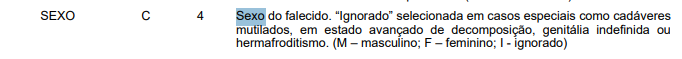

In [47]:
df.loc[:, 'SEXO'] = (
    df['SEXO']
    .map({1: 'Masculino', 2: 'Feminino', 0: 'Ignorado'})
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Para RACACOR temos que:
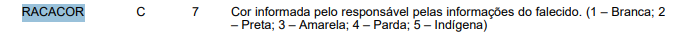

In [48]:
df.loc[:, 'RACACOR'] = (
    df['RACACOR']
    .map({
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indígena'
    })
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Para ESC temos:
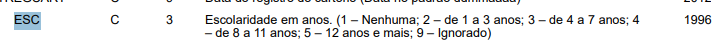

In [49]:
df.loc[:, 'ESC'] = (
    df['ESC']
    .map({
        1: 'Nenhuma',
        2: '1 a 3 anos',
        3: '4 a 7 anos',
        4: '8 a 11 anos',
        5: '12 anos ou mais'
    })
    .fillna('Ignorado')
)


Para ESTCIV	Temos:
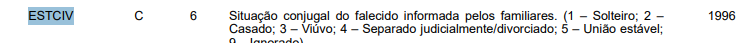

In [53]:
df.loc[:, 'ESTCIV'] = (
    df['ESTCIV']
    .map({
        1: 'Solteiro',
        2: 'Casado',
        3: 'Viúvo',
        4: 'Separado/Divorciado',
        5: 'União estável'
    })
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [52]:
# Agora vamos ver as outras colunas:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO',
       'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELI

In [54]:
df.head(100)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40,Feminino,Branca,Solteiro,12 anos ou mais,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32,Feminino,Branca,Solteiro,4 a 7 anos,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60,Masculino,Branca,Solteiro,4 a 7 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31,Masculino,Branca,Solteiro,Ignorado,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,2023-01-02,NaT,Pernambuco,Jaboatão dos Guararapes,1996-07-19,26,Feminino,Branca,Solteiro,12 anos ou mais,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
5924,2023-01-02,17:00:00,Goiás,Anápolis,1990-07-13,32,Masculino,Branca,Solteiro,12 anos ou mais,...,NaN,NaN,NaN,NaN,NaN,NaN,X700,N,NaN,NaN
5975,2023-01-02,05:00:00,Pernambuco,Garanhuns,1972-09-27,50,Masculino,Parda,Casado,4 a 7 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,R99,S,NaN,NaN
5981,2023-01-02,15:36:00,Paraná,Curitiba,1993-02-13,29,Masculino,Branca,União estável,8 a 11 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,Y200,S,NaN,NaN


In [ ]:
df['RACACOR'].describe() # Apenas Curiosidade

count      16259
unique         6
top       Branca
freq        7581
Name: RACACOR, dtype: object

Daqui para frente vou parar de trazer os dicionários no markdown, para dúvidas consulte dicionário

In [59]:
df.loc[:, 'ESC2010'] = (
    df['ESC2010']
    .map({
        0: 'Sem escolaridade',
        1: 'Fundamental I (1ª a 4ª série)',
        2: 'Fundamental II (5ª a 8ª série)',
        3: 'Ensino Médio',
        4: 'Superior incompleto',
        5: 'Superior completo'
    })
    .fillna('Ignorado')
)


In [60]:
df['ESC2010']

9                                Ignorado
102                     Superior completo
160        Fundamental II (5ª a 8ª série)
184         Fundamental I (1ª a 4ª série)
185                              Ignorado
                        ...              
1465530                  Sem escolaridade
1465589    Fundamental II (5ª a 8ª série)
1465595                          Ignorado
1465603                  Sem escolaridade
1465608                  Sem escolaridade
Name: ESC2010, Length: 16259, dtype: object

In [61]:
df.loc[:, 'SERIESCFAL'] = (
    df['SERIESCFAL']
    .map({
        1: '1ª série',
        2: '2ª série',
        3: '3ª série',
        4: '4ª série',
        5: '5ª série',
        6: '6ª série',
        7: '7ª série',
        8: '8ª série'
    })
    .fillna('Ignorado')
)
df['SERIESCFAL'].head(10)

9      Ignorado
102    Ignorado
160    Ignorado
184    4ª série
185    Ignorado
338    Ignorado
351    3ª série
353    Ignorado
378    Ignorado
412    3ª série
Name: SERIESCFAL, dtype: object

In [62]:
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40,Feminino,Branca,Solteiro,12 anos ou mais,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32,Feminino,Branca,Solteiro,4 a 7 anos,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60,Masculino,Branca,Solteiro,4 a 7 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31,Masculino,Branca,Solteiro,Ignorado,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,2023-11-18,NaT,Minas Gerais,Santo Antônio do Rio Abaixo,1970-08-15,53,Masculino,Parda,Ignorado,Nenhuma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,2023-09-27,20:00:00,Amapá,Pedra Branca do Amapari,2005-03-26,18,Masculino,Indígena,Ignorado,8 a 11 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,2023-11-01,19:00:00,Amazonas,Eirunepé,2011-01-01,12,Feminino,Indígena,Ignorado,Ignorado,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465603,2023-11-26,15:40:00,Amazonas,Eirunepé,2002-01-01,21,Feminino,Indígena,Ignorado,Nenhuma,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# continua...